In [324]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import matplotlib.dates as mdates
import squarify



In [325]:
# Read the city's csv file
london_df = pd.read_csv("CleanDatasets/london_AQI.csv")
london_df = london_df.sort_values("date")

# london_df.dtypes
london_df["date"] = pd.to_datetime(london_df["date"])
london_df

,date,pm25,pm10,o3,no2,so2,co,AQI
0,2019-01-02,49,22,23,26,1,8,49
1,2019-01-03,59,26,24,31,1,8,59
2,2019-01-04,55,39,16,31,1,10,55
3,2019-01-05,92,31,19,29,2,10,92
4,2019-01-06,81,29,14,31,2,10,81
...,...,...,...,...,...,...,...,...
525,2020-07-09,46,13,18,12,4,5,46
526,2020-07-19,44,9,23,11,1,1,44
527,2020-07-23,50,19,39,26,1,1,50
528,2020-07-24,47,16,22,20,2,1,47


In [326]:
# Create a data frame for the lockdown period of the city
london_lockdown_df=london_df[(london_df['date']>='2020-03-23') & (london_df['date']<='2020-05-10')]
london_lockdown_df

,date,pm25,pm10,o3,no2,so2,co,AQI
425,2020-03-23,53,26,21,29,4,7,53
426,2020-03-24,58,25,32,28,3,5,58
427,2020-03-25,60,36,28,30,4,7,60
428,2020-03-26,80,47,34,21,5,6,80
429,2020-03-27,99,40,40,16,9,4,99
430,2020-03-28,90,30,37,9,4,4,90
431,2020-03-29,56,21,34,6,3,6,56
432,2020-03-30,29,17,32,12,3,4,32
433,2020-03-31,26,18,33,15,5,5,33
434,2020-04-01,38,22,31,24,6,5,38


In [327]:
# Set date as index
london_lockdown_df = london_lockdown_df.set_index("date")


In [328]:
# Create a data frame for the 2019 data, same months as the lockdown period in 2020
london_2019_df=london_df[(london_df['date']>='2019-03-23') & (london_df['date']<='2019-05-10')]
london_2019_df

,date,pm25,pm10,o3,no2,so2,co,AQI
79,2019-03-23,56,24,28,28,2,9,56
80,2019-03-24,57,23,34,26,2,9,57
81,2019-03-25,62,22,33,24,2,9,62
82,2019-03-26,42,32,29,38,2,11,42
83,2019-03-27,67,27,29,35,2,10,67
84,2019-03-28,58,35,28,52,3,10,58
85,2019-03-29,74,45,34,46,2,7,74
86,2019-03-30,82,53,36,42,3,10,82
87,2019-03-31,113,31,36,25,4,8,113
88,2019-04-01,33,25,34,33,2,8,34


In [329]:
# Set date as index
london_2019_df = london_2019_df.set_index("date")


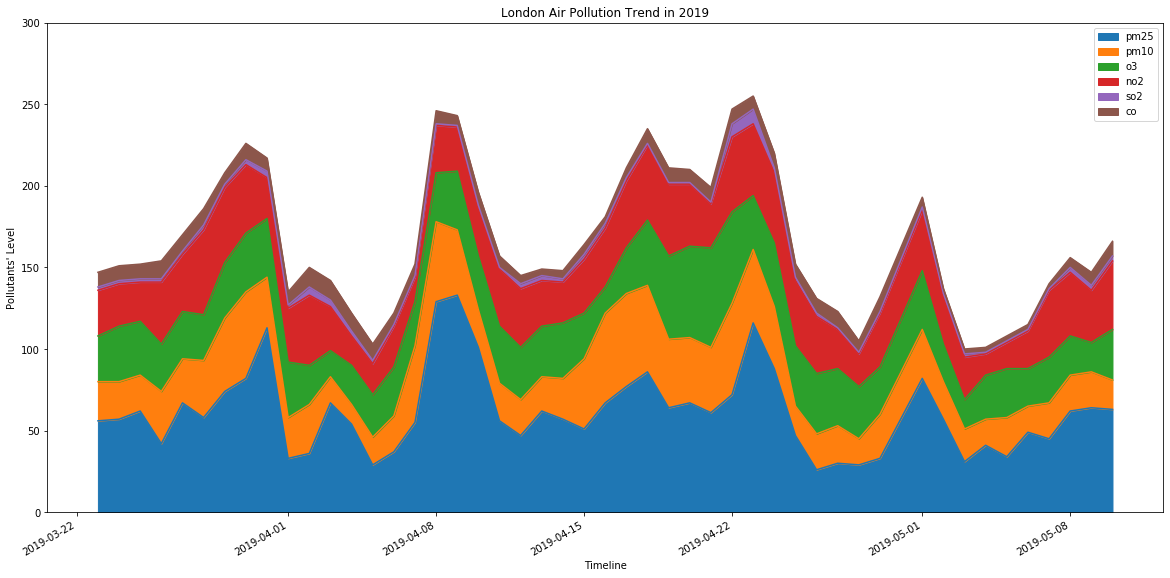

In [330]:
# Create an stacked area chart for the pollutant levels in 2019
london_2019_df[['pm25', 'pm10', 'o3', 'no2', 'so2', 'co']].plot.area(figsize=(20,10))
# set y limit
plt.ylim(0,300)
# Creat tite, x and y label
plt.title("London Air Pollution Trend in 2019")
plt.xlabel("Timeline")
plt.ylabel("Pollutants' Level")
plt.show()

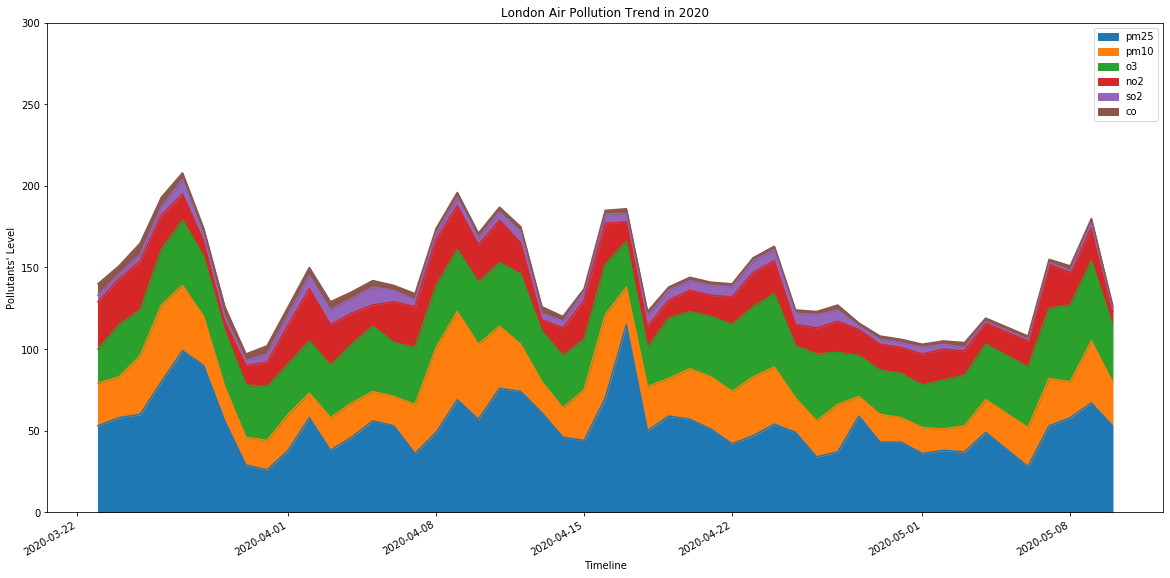

In [331]:
# Create an stacked area chart for the pollutant levels in lockdown 2020
london_lockdown_df[['pm25', 'pm10', 'o3', 'no2', 'so2', 'co']].plot.area(figsize=(20,10))
# set y limit
plt.ylim(0,300)
# Creat tite, x and y label
plt.title("London Air Pollution Trend in 2020")
plt.xlabel("Timeline")
plt.ylabel("Pollutants' Level")
plt.show()

In [332]:
# Compute quartiles and upper and lower bounds for pm25
london_2019_quartiles = london_2019_df["pm25"].quantile([.25,.5,.75])
# Compute the lower quartile
london_2019_lowerq = london_2019_quartiles[0.25]

# Compute the upper quartile
london_2019_upperq = london_2019_quartiles[0.75]
london_2019_iqr = london_2019_upperq-london_2019_lowerq
print(f"The lower quartile of london_2019  is: {london_2019_lowerq}")
print(f"The upper quartile of london_2019 is: {london_2019_upperq}")
print(f"The interquartile range of london_2019 is: {london_2019_iqr}")
lower_bound = london_2019_lowerq - (1.5*london_2019_iqr)
upper_bound = london_2019_upperq + (1.5*london_2019_iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

# Compute the outliers
outlier_london_2019 = london_2019_df.loc[(london_2019_df["pm25"] < lower_bound) | (london_2019_df["pm25"] > upper_bound)]
outlier_london_2019

The lower quartile of london_2019  is: 44.25
The upper quartile of london_2019 is: 68.25
The interquartile range of london_2019 is: 24.0
Values below 8.25 could be outliers.
Values above 104.25 could be outliers.


,pm25,pm10,o3,no2,so2,co,AQI
date,,,,,,,
2019-03-31,113,31,36,25,4,8,113
2019-04-08,129,49,30,29,1,8,129
2019-04-09,133,40,36,27,1,6,133
2019-04-23,116,45,33,44,9,8,116


In [333]:
# Compute quartiles and upper and lower bounds for pm10
london_2019_quartiles = london_2019_df["pm10"].quantile([.25,.5,.75])
# Compute the lower quartile
london_2019_lowerq = london_2019_quartiles[0.25]

# Compute the upper quartile
london_2019_upperq = london_2019_quartiles[0.75]
london_2019_iqr = london_2019_upperq-london_2019_lowerq
print(f"The lower quartile of london_2019  is: {london_2019_lowerq}")
print(f"The upper quartile of london_2019 is: {london_2019_upperq}")
print(f"The interquartile range of london_2019 is: {london_2019_iqr}")
lower_bound = london_2019_lowerq - (1.5*london_2019_iqr)
upper_bound = london_2019_upperq + (1.5*london_2019_iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

# Compute the outliers
outlier_london_2019 = london_2019_df.loc[(london_2019_df["pm10"] < lower_bound) | (london_2019_df["pm10"] > upper_bound)]
outlier_london_2019

The lower quartile of london_2019  is: 22.0
The upper quartile of london_2019 is: 40.0
The interquartile range of london_2019 is: 18.0
Values below -5.0 could be outliers.
Values above 67.0 could be outliers.


,pm25,pm10,o3,no2,so2,co,AQI
date,,,,,,,


In [334]:
# Compute quartiles and upper and lower bounds for o3
london_2019_quartiles = london_2019_df["o3"].quantile([.25,.5,.75])
# Compute the lower quartile
london_2019_lowerq = london_2019_quartiles[0.25]

# Compute the upper quartile
london_2019_upperq = london_2019_quartiles[0.75]
london_2019_iqr = london_2019_upperq-london_2019_lowerq
print(f"The lower quartile of london_2019  is: {london_2019_lowerq}")
print(f"The upper quartile of london_2019 is: {london_2019_upperq}")
print(f"The interquartile range of london_2019 is: {london_2019_iqr}")
lower_bound = london_2019_lowerq - (1.5*london_2019_iqr)
upper_bound = london_2019_upperq + (1.5*london_2019_iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

# Compute the outliers
outlier_london_2019 = london_2019_df.loc[(london_2019_df["o3"] < lower_bound) | (london_2019_df["o3"] > upper_bound)]
outlier_london_2019

The lower quartile of london_2019  is: 27.75
The upper quartile of london_2019 is: 35.25
The interquartile range of london_2019 is: 7.5
Values below 16.5 could be outliers.
Values above 46.5 could be outliers.


,pm25,pm10,o3,no2,so2,co,AQI
date,,,,,,,
2019-04-03,67,16,16,27,4,12,67
2019-04-16,67,55,16,36,3,4,67
2019-04-19,64,42,51,44,1,9,64
2019-04-20,67,40,56,38,1,8,67
2019-04-21,61,40,61,27,1,9,61
2019-04-22,72,56,56,46,8,9,72


In [335]:
# Compute quartiles and upper and lower bounds for NO2
london_2019_quartiles = london_2019_df["no2"].quantile([.25,.5,.75])
# Compute the lower quartile
london_2019_lowerq = london_2019_quartiles[0.25]

# Compute the upper quartile
london_2019_upperq = london_2019_quartiles[0.75]
london_2019_iqr = london_2019_upperq-london_2019_lowerq
print(f"The lower quartile of london_2019  is: {london_2019_lowerq}")
print(f"The upper quartile of london_2019 is: {london_2019_upperq}")
print(f"The interquartile range of london_2019 is: {london_2019_iqr}")
lower_bound = london_2019_lowerq - (1.5*london_2019_iqr)
upper_bound = london_2019_upperq + (1.5*london_2019_iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

# Compute the outliers
outlier_london_2019 = london_2019_df.loc[(london_2019_df["no2"] < lower_bound) | (london_2019_df["no2"] > upper_bound)]
outlier_london_2019

The lower quartile of london_2019  is: 25.75
The upper quartile of london_2019 is: 40.25
The interquartile range of london_2019 is: 14.5
Values below 4.0 could be outliers.
Values above 62.0 could be outliers.


,pm25,pm10,o3,no2,so2,co,AQI
date,,,,,,,


In [336]:
# Compute quartiles and upper and lower bounds for SO2
london_2019_quartiles = london_2019_df["so2"].quantile([.25,.5,.75])
# Compute the lower quartile
london_2019_lowerq = london_2019_quartiles[0.25]

# Compute the upper quartile
london_2019_upperq = london_2019_quartiles[0.75]
london_2019_iqr = london_2019_upperq-london_2019_lowerq
print(f"The lower quartile of london_2019  is: {london_2019_lowerq}")
print(f"The upper quartile of london_2019 is: {london_2019_upperq}")
print(f"The interquartile range of london_2019 is: {london_2019_iqr}")
lower_bound = london_2019_lowerq - (1.5*london_2019_iqr)
upper_bound = london_2019_upperq + (1.5*london_2019_iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

# Compute the outliers
outlier_london_2019 = london_2019_df.loc[(london_2019_df["so2"] < lower_bound) | (london_2019_df["so2"] > upper_bound)]
outlier_london_2019

The lower quartile of london_2019  is: 1.0
The upper quartile of london_2019 is: 3.0
The interquartile range of london_2019 is: 2.0
Values below -2.0 could be outliers.
Values above 6.0 could be outliers.


,pm25,pm10,o3,no2,so2,co,AQI
date,,,,,,,
2019-04-22,72,56,56,46,8,9,72
2019-04-23,116,45,33,44,9,8,116


In [337]:
# Compute quartiles and upper and lower bounds for CO
london_2019_quartiles = london_2019_df["co"].quantile([.25,.5,.75])
# Compute the lower quartile
london_2019_lowerq = london_2019_quartiles[0.25]

# Compute the upper quartile
london_2019_upperq = london_2019_quartiles[0.75]
london_2019_iqr = london_2019_upperq-london_2019_lowerq
print(f"The lower quartile of london_2019  is: {london_2019_lowerq}")
print(f"The upper quartile of london_2019 is: {london_2019_upperq}")
print(f"The interquartile range of london_2019 is: {london_2019_iqr}")
lower_bound = london_2019_lowerq - (1.5*london_2019_iqr)
upper_bound = london_2019_upperq + (1.5*london_2019_iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

# Compute the outliers
outlier_london_2019 = london_2019_df.loc[(london_2019_df["co"] < lower_bound) | (london_2019_df["co"] > upper_bound)]
outlier_london_2019

The lower quartile of london_2019  is: 6.0
The upper quartile of london_2019 is: 9.0
The interquartile range of london_2019 is: 3.0
Values below 1.5 could be outliers.
Values above 13.5 could be outliers.


,pm25,pm10,o3,no2,so2,co,AQI
date,,,,,,,


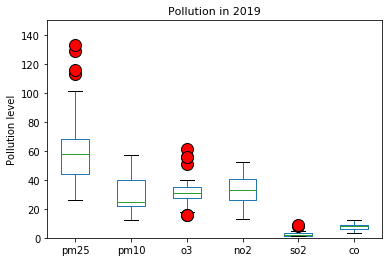

In [338]:
# Create a box plot with outliers
# plot. Set color of marker face and marker edge

flierprops = dict(marker='o', markerfacecolor='r', markersize=12,
                  linestyle='none', markeredgecolor='k')
box_plot = london_2019_df.boxplot(grid=False, column=['pm25','pm10', 'o3', 'no2', 'so2', 'co'], flierprops=flierprops)
# Set y limit
plt.ylim(0,150)
# Set the title and y axis label
box_plot.set_title('Pollution in 2019', fontsize=11)
box_plot.set_ylabel("Pollution level")
plt.show()

In [339]:
# Compute quartiles and upper and lower bounds for pm25 during the lockdown period
london_lockdown_quartiles =london_lockdown_df["pm25"].quantile([.25,.5,.75])
# Compute the lower quartile
london_lockdown_lowerq = london_lockdown_quartiles[0.25]

# Compute the upper quartile
london_lockdown_upperq = london_lockdown_quartiles[0.75]
london_lockdown_iqr = london_lockdown_upperq-london_lockdown_lowerq
print(f"The lower quartile of london in lockdown is: {london_lockdown_lowerq}")
print(f"The upper quartile of london in lockdown is: {london_lockdown_upperq}")
print(f"The interquartile range of london in lockdown is: {london_lockdown_iqr}")
lower_bound = london_lockdown_lowerq - (1.5*london_lockdown_iqr)
upper_bound =london_lockdown_upperq + (1.5*london_lockdown_iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

# Compute the outliers
outlier_london_lockdown = london_lockdown_df.loc[(london_lockdown_df["pm25"] < lower_bound) | (london_lockdown_df["pm25"] > upper_bound)]
outlier_london_lockdown

The lower quartile of london in lockdown is: 42.75
The upper quartile of london in lockdown is: 59.0
The interquartile range of london in lockdown is: 16.25
Values below 18.375 could be outliers.
Values above 83.375 could be outliers.


,pm25,pm10,o3,no2,so2,co,AQI
date,,,,,,,
2020-03-27,99,40,40,16,9,4,99
2020-03-28,90,30,37,9,4,4,90
2020-04-17,115,23,28,12,5,3,115


In [340]:
# Compute quartiles and upper and lower bounds for pm10 during the lockdown period
london_lockdown_quartiles =london_lockdown_df["pm10"].quantile([.25,.5,.75])
# Compute the lower quartile
london_lockdown_lowerq = london_lockdown_quartiles[0.25]

# Compute the upper quartile
london_lockdown_upperq = london_lockdown_quartiles[0.75]
london_lockdown_iqr = london_lockdown_upperq-london_lockdown_lowerq
print(f"The lower quartile of london in lockdown is: {london_lockdown_lowerq}")
print(f"The upper quartile of london in lockdown is: {london_lockdown_upperq}")
print(f"The interquartile range of london in lockdown is: {london_lockdown_iqr}")
lower_bound = london_lockdown_lowerq - (1.5*london_lockdown_iqr)
upper_bound =london_lockdown_upperq + (1.5*london_lockdown_iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
# Compute the outliers
outlier_london_lockdown = london_lockdown_df.loc[(london_lockdown_df["pm10"] < lower_bound) | (london_lockdown_df["pm10"] > upper_bound)]
outlier_london_lockdown

The lower quartile of london in lockdown is: 18.75
The upper quartile of london in lockdown is: 32.0
The interquartile range of london in lockdown is: 13.25
Values below -1.125 could be outliers.
Values above 51.875 could be outliers.


,pm25,pm10,o3,no2,so2,co,AQI
date,,,,,,,
2020-04-08,49,52,38,28,4,3,52
2020-04-09,69,54,38,27,5,3,69


In [341]:
# Compute quartiles and upper and lower bounds for o3 during the lockdown period
london_lockdown_quartiles =london_lockdown_df["o3"].quantile([.25,.5,.75])
# Compute the lower quartile
london_lockdown_lowerq = london_lockdown_quartiles[0.25]

# Compute the upper quartile
london_lockdown_upperq = london_lockdown_quartiles[0.75]
london_lockdown_iqr = london_lockdown_upperq-london_lockdown_lowerq
print(f"The lower quartile of london in lockdown is: {london_lockdown_lowerq}")
print(f"The upper quartile of london in lockdown is: {london_lockdown_upperq}")
print(f"The interquartile range of london in lockdown is: {london_lockdown_iqr}")
lower_bound = london_lockdown_lowerq - (1.5*london_lockdown_iqr)
upper_bound =london_lockdown_upperq + (1.5*london_lockdown_iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
# Compute the outliers
outlier_london_lockdown = london_lockdown_df.loc[(london_lockdown_df["o3"] < lower_bound) | (london_lockdown_df["o3"] > upper_bound)]
outlier_london_lockdown

The lower quartile of london in lockdown is: 31.0
The upper quartile of london in lockdown is: 38.0
The interquartile range of london in lockdown is: 7.0
Values below 20.5 could be outliers.
Values above 48.5 could be outliers.


,pm25,pm10,o3,no2,so2,co,AQI
date,,,,,,,
2020-05-09,67,38,49,20,3,3,67


In [342]:
# Compute quartiles and upper and lower bounds for no2 during the lockdown period
london_lockdown_quartiles =london_lockdown_df["no2"].quantile([.25,.5,.75])
# Compute the lower quartile
london_lockdown_lowerq = london_lockdown_quartiles[0.25]

# Compute the upper quartile
london_lockdown_upperq = london_lockdown_quartiles[0.75]
london_lockdown_iqr = london_lockdown_upperq-london_lockdown_lowerq
print(f"The lower quartile of london in lockdown is: {london_lockdown_lowerq}")
print(f"The upper quartile of london in lockdown is: {london_lockdown_upperq}")
print(f"The interquartile range of london in lockdown is: {london_lockdown_iqr}")
lower_bound = london_lockdown_lowerq - (1.5*london_lockdown_iqr)
upper_bound =london_lockdown_upperq + (1.5*london_lockdown_iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
# Compute the outliers
outlier_london_lockdown = london_lockdown_df.loc[(london_lockdown_df["no2"] < lower_bound) | (london_lockdown_df["no2"] > upper_bound)]
outlier_london_lockdown

The lower quartile of london in lockdown is: 13.0
The upper quartile of london in lockdown is: 24.25
The interquartile range of london in lockdown is: 11.25
Values below -3.875 could be outliers.
Values above 41.125 could be outliers.


,pm25,pm10,o3,no2,so2,co,AQI
date,,,,,,,


In [343]:
# Compute quartiles and upper and lower bounds for so2 during the lockdown period
london_lockdown_quartiles =london_lockdown_df["so2"].quantile([.25,.5,.75])
# Compute the lower quartile
london_lockdown_lowerq = london_lockdown_quartiles[0.25]

# Compute the upper quartile
london_lockdown_upperq = london_lockdown_quartiles[0.75]
london_lockdown_iqr = london_lockdown_upperq-london_lockdown_lowerq
print(f"The lower quartile of london in lockdown is: {london_lockdown_lowerq}")
print(f"The upper quartile of london in lockdown is: {london_lockdown_upperq}")
print(f"The interquartile range of london in lockdown is: {london_lockdown_iqr}")
lower_bound = london_lockdown_lowerq - (1.5*london_lockdown_iqr)
upper_bound =london_lockdown_upperq + (1.5*london_lockdown_iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
# Compute the outliers
outlier_london_lockdown = london_lockdown_df.loc[(london_lockdown_df["so2"] < lower_bound) | (london_lockdown_df["so2"] > upper_bound)]
outlier_london_lockdown

The lower quartile of london in lockdown is: 3.0
The upper quartile of london in lockdown is: 6.25
The interquartile range of london in lockdown is: 3.25
Values below -1.875 could be outliers.
Values above 11.125 could be outliers.


,pm25,pm10,o3,no2,so2,co,AQI
date,,,,,,,


In [344]:
# Compute quartiles and upper and lower bounds for co during the lockdown period
london_lockdown_quartiles =london_lockdown_df["co"].quantile([.25,.5,.75])
# Compute the lower quartile
london_lockdown_lowerq = london_lockdown_quartiles[0.25]

# Compute the upper quartile
london_lockdown_upperq = london_lockdown_quartiles[0.75]
london_lockdown_iqr = london_lockdown_upperq-london_lockdown_lowerq
print(f"The lower quartile of london in lockdown is: {london_lockdown_lowerq}")
print(f"The upper quartile of london in lockdown is: {london_lockdown_upperq}")
print(f"The interquartile range of london in lockdown is: {london_lockdown_iqr}")
lower_bound = london_lockdown_lowerq - (1.5*london_lockdown_iqr)
upper_bound =london_lockdown_upperq + (1.5*london_lockdown_iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
# Compute the outliers
outlier_london_lockdown = london_lockdown_df.loc[(london_lockdown_df["co"] < lower_bound) | (london_lockdown_df["co"] > upper_bound)]
outlier_london_lockdown

The lower quartile of london in lockdown is: 2.0
The upper quartile of london in lockdown is: 4.0
The interquartile range of london in lockdown is: 2.0
Values below -1.0 could be outliers.
Values above 7.0 could be outliers.


,pm25,pm10,o3,no2,so2,co,AQI
date,,,,,,,


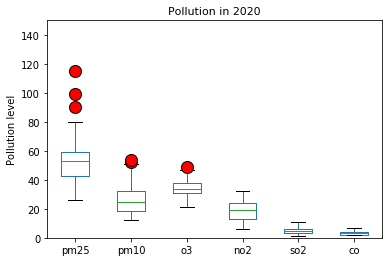

In [345]:
# Create a box plot with outliers
# plot. Set color of marker face and marker edge

flierprops = dict(marker='o', markerfacecolor='r', markersize=12,
                  linestyle='none', markeredgecolor='k')
box_plot = london_lockdown_df.boxplot(grid=False, column=['pm25','pm10', 'o3', 'no2', 'so2', 'co'], flierprops=flierprops)
# Set y limit
plt.ylim(0,150)
# Set the title and y axis label
box_plot.set_title('Pollution in 2020', fontsize=11)
box_plot.set_ylabel("Pollution level")
plt.show()

In [346]:
# Reset index
london_lockdown_df = london_lockdown_df.reset_index("date")


In [347]:
# Extract the month-day from the date and create a new column
london_lockdown_df["new_date"] = london_lockdown_df["date"].dt.strftime("%m-%d")
london_lockdown_df.head()

,date,pm25,pm10,o3,no2,so2,co,AQI,new_date
0,2020-03-23,53,26,21,29,4,7,53,03-23
1,2020-03-24,58,25,32,28,3,5,58,03-24
2,2020-03-25,60,36,28,30,4,7,60,03-25
3,2020-03-26,80,47,34,21,5,6,80,03-26
4,2020-03-27,99,40,40,16,9,4,99,03-27


In [348]:
# Reset index
london_2019_df = london_2019_df.reset_index("date")


In [349]:
# Extract the month-day from the date and create a new column
london_2019_df["new_date"] = london_2019_df["date"].dt.strftime("%m-%d")
london_2019_df.head()

,date,pm25,pm10,o3,no2,so2,co,AQI,new_date
0,2019-03-23,56,24,28,28,2,9,56,03-23
1,2019-03-24,57,23,34,26,2,9,57,03-24
2,2019-03-25,62,22,33,24,2,9,62,03-25
3,2019-03-26,42,32,29,38,2,11,42,03-26
4,2019-03-27,67,27,29,35,2,10,67,03-27


In [350]:
# Merge two data sets
new_london_df = london_2019_df.merge(london_lockdown_df, on= "new_date")
new_london_df.head()

,date_x,pm25_x,pm10_x,o3_x,no2_x,so2_x,co_x,AQI_x,new_date,date_y,pm25_y,pm10_y,o3_y,no2_y,so2_y,co_y,AQI_y
0,2019-03-23,56,24,28,28,2,9,56,03-23,2020-03-23,53,26,21,29,4,7,53
1,2019-03-24,57,23,34,26,2,9,57,03-24,2020-03-24,58,25,32,28,3,5,58
2,2019-03-25,62,22,33,24,2,9,62,03-25,2020-03-25,60,36,28,30,4,7,60
3,2019-03-26,42,32,29,38,2,11,42,03-26,2020-03-26,80,47,34,21,5,6,80
4,2019-03-27,67,27,29,35,2,10,67,03-27,2020-03-27,99,40,40,16,9,4,99


In [351]:
# Rename the columns for intuitive naming
new_london_df = new_london_df.rename(columns={'date_x':'Date 2019', 'pm25_x':'2019 pm25', 'pm10_x':'2019 pm10', 'o3_x':'2019 o3', 'no2_x':'2019 no2', 'so2_x':'2019 so2', 'co_x':'2019 co', 'AQI_x':'2019 AQI', 'date_y':'Date 2020', 'pm25_y':'2020 pm25', 'pm10_y':'2020 pm10', 'o3_y':'2020 o3', 'no2_y':'2020 no2', 'so2_y':'2020 so2', 'co_y':'2020 co', 'AQI_y':'2020 AQI'})
new_london_df.head()

,Date 2019,2019 pm25,2019 pm10,2019 o3,2019 no2,2019 so2,2019 co,2019 AQI,new_date,Date 2020,2020 pm25,2020 pm10,2020 o3,2020 no2,2020 so2,2020 co,2020 AQI
0,2019-03-23,56,24,28,28,2,9,56,03-23,2020-03-23,53,26,21,29,4,7,53
1,2019-03-24,57,23,34,26,2,9,57,03-24,2020-03-24,58,25,32,28,3,5,58
2,2019-03-25,62,22,33,24,2,9,62,03-25,2020-03-25,60,36,28,30,4,7,60
3,2019-03-26,42,32,29,38,2,11,42,03-26,2020-03-26,80,47,34,21,5,6,80
4,2019-03-27,67,27,29,35,2,10,67,03-27,2020-03-27,99,40,40,16,9,4,99


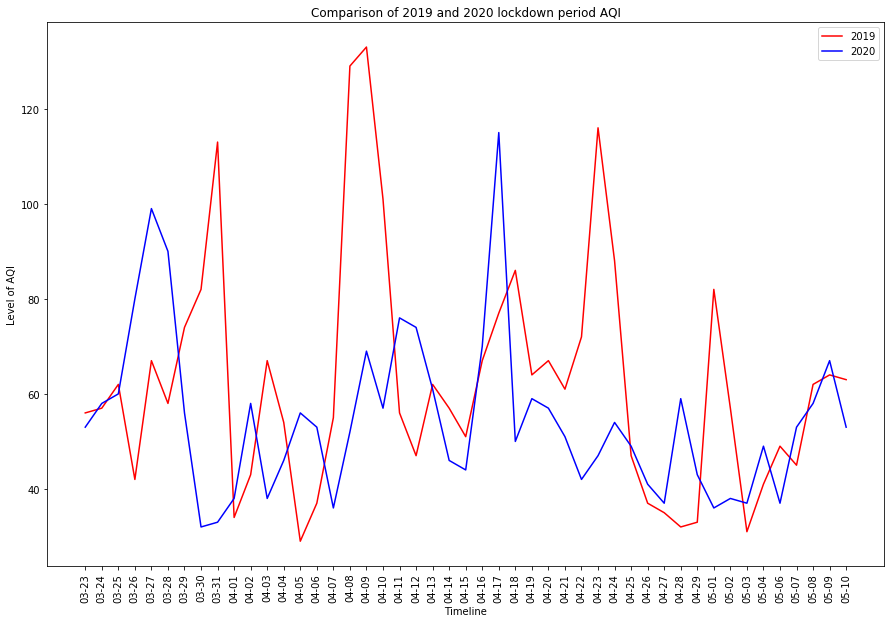

In [352]:
# Create a line plot that compares AQI for lockdown periods between 2019 and 2020
x_axis=new_london_df["new_date"]
y_axis=new_london_df["2019 AQI"]
x2=new_london_df["new_date"]
y2=new_london_df["2020 AQI"]

plt.figure(figsize=(15,10))
plt.xticks(rotation=90)
london_2019, = plt.plot(x_axis,y_axis, color="red", label="2019")
london_2020, = plt.plot(x2,y2,  color="blue", label="2020")

# Create a legend for our plot
plt.legend(handles=[london_2019, london_2020], loc="best")
# set the title and label for the plot
plt.title("Comparison of 2019 and 2020 lockdown period AQI")
plt.xlabel("Timeline")
plt.ylabel("Level of AQI")
plt.show()

In [353]:
# Compute a mean of the pollutants during the same months in 2019 as lockdown period in 2020
london_2019_mean = london_2019_df.mean()
london_2019_mean[0:6]

pm25    61.437500
pm10    30.250000
o3      31.979167
no2     32.395833
so2      2.270833
co       7.500000
dtype: float64

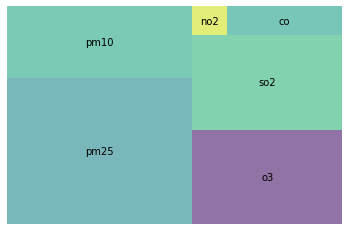

In [354]:
# Create a treemap for the pollutants for the period in 2019
squarify.plot(sizes=london_2019_mean[0:6], label=["pm25", "pm10", "o3", "so2", "no2", "co",], alpha=.6)
plt.axis('off')
plt.show()

In [355]:
# Compute a mean of the pollutants during the lockdown period
london_lockdown_mean = london_lockdown_df.mean()
london_lockdown_mean[0:6]

pm25    53.770833
pm10    27.125000
o3      34.520833
no2     18.708333
so2      4.895833
co       3.250000
dtype: float64

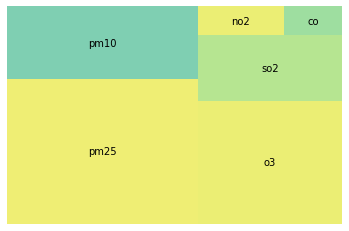

In [356]:
# Create a treemap for the pollutants for the lockdown period in 2020
squarify.plot(sizes=london_lockdown_mean[0:6], label=["pm25", "pm10", "o3", "so2", "no2", "co"], alpha=.6)
plt.axis('off')
plt.show()